In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [0]:
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/RELIANCE.csv')

In [3]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [0]:
df=data['Open']

In [5]:
df

0        237.50
1        258.40
2        256.65
3        289.00
4        295.00
         ...   
5054    1350.15
5055    1434.00
5056    1450.00
5057    1444.90
5058    1453.95
Name: Open, Length: 5059, dtype: float64

In [0]:
scaler=MinMaxScaler()
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [7]:
df

array([[0.01034762],
       [0.0171059 ],
       [0.01654002],
       ...,
       [0.40242522],
       [0.40077607],
       [0.40370251]])

In [0]:
split = int(0.75*len(df))

In [0]:
train=df[0:split]
test=df[split:]

In [0]:
def dataset(data, time_step):
	dataX, dataY = [], []
	for i in range(len(data)-time_step-1):
		a = data[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(data[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
time_step = 100
x_train, y_train = dataset(train, time_step)
x_test, y_test = dataset(test, time_step)

In [21]:
print(y_train.shape)
x_train.shape

(3693,)


(3693, 100)

In [22]:
x_train

array([[0.01034762, 0.0171059 , 0.01654002, ..., 0.03453517, 0.03534357,
        0.03654002],
       [0.0171059 , 0.01654002, 0.02700081, ..., 0.03534357, 0.03654002,
        0.04373484],
       [0.01654002, 0.02700081, 0.02894099, ..., 0.03654002, 0.04373484,
        0.04704931],
       ...,
       [0.24455942, 0.25012126, 0.24127728, ..., 0.22215036, 0.21975748,
        0.21453517],
       [0.25012126, 0.24127728, 0.23621665, ..., 0.21975748, 0.21453517,
        0.21194826],
       [0.24127728, 0.23621665, 0.23702506, ..., 0.21453517, 0.21194826,
        0.21099434]])

In [0]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [24]:
x_train

array([[[0.01034762],
        [0.0171059 ],
        [0.01654002],
        ...,
        [0.03453517],
        [0.03534357],
        [0.03654002]],

       [[0.0171059 ],
        [0.01654002],
        [0.02700081],
        ...,
        [0.03534357],
        [0.03654002],
        [0.04373484]],

       [[0.01654002],
        [0.02700081],
        [0.02894099],
        ...,
        [0.03654002],
        [0.04373484],
        [0.04704931]],

       ...,

       [[0.24455942],
        [0.25012126],
        [0.24127728],
        ...,
        [0.22215036],
        [0.21975748],
        [0.21453517]],

       [[0.25012126],
        [0.24127728],
        [0.23621665],
        ...,
        [0.21975748],
        [0.21453517],
        [0.21194826]],

       [[0.24127728],
        [0.23621665],
        [0.23702506],
        ...,
        [0.21453517],
        [0.21194826],
        [0.21099434]]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [0]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
58/58 [==============================] - 2s 33ms/step - loss: 0.0073 - val_loss: 0.0010
Epoch 2/100
58/58 [==============================] - 1s 17ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
58/58 [==============================] - 1s 17ms/step - loss: 9.7471e-04 - val_loss: 8.8244e-04
Epoch 4/100
58/58 [==============================] - 1s 17ms/step - loss: 8.6050e-04 - val_loss: 7.7236e-04
Epoch 5/100
58/58 [==============================] - 1s 17ms/step - loss: 7.3953e-04 - val_loss: 9.9297e-04
Epoch 6/100
58/58 [==============================] - 1s 17ms/step - loss: 7.3321e-04 - val_loss: 6.2689e-04
Epoch 7/100
58/58 [==============================] - 1s 17ms/step - loss: 6.6747e-04 - val_loss: 5.6733e-04
Epoch 8/100
58/58 [==============================] - 1s 17ms/step - loss: 5.5885e-04 - val_loss: 5.2673e-04
Epoch 9/100
58/58 [==============================] - 1s 17ms/step - loss: 6.1130e-04 - val_loss: 6.9687e-04
Epoch 10/100
58/58 [========================

In [0]:
train_predict=scaler.inverse_transform(model.predict(x_train))
test_predict=scaler.inverse_transform(model.predict(x_test))

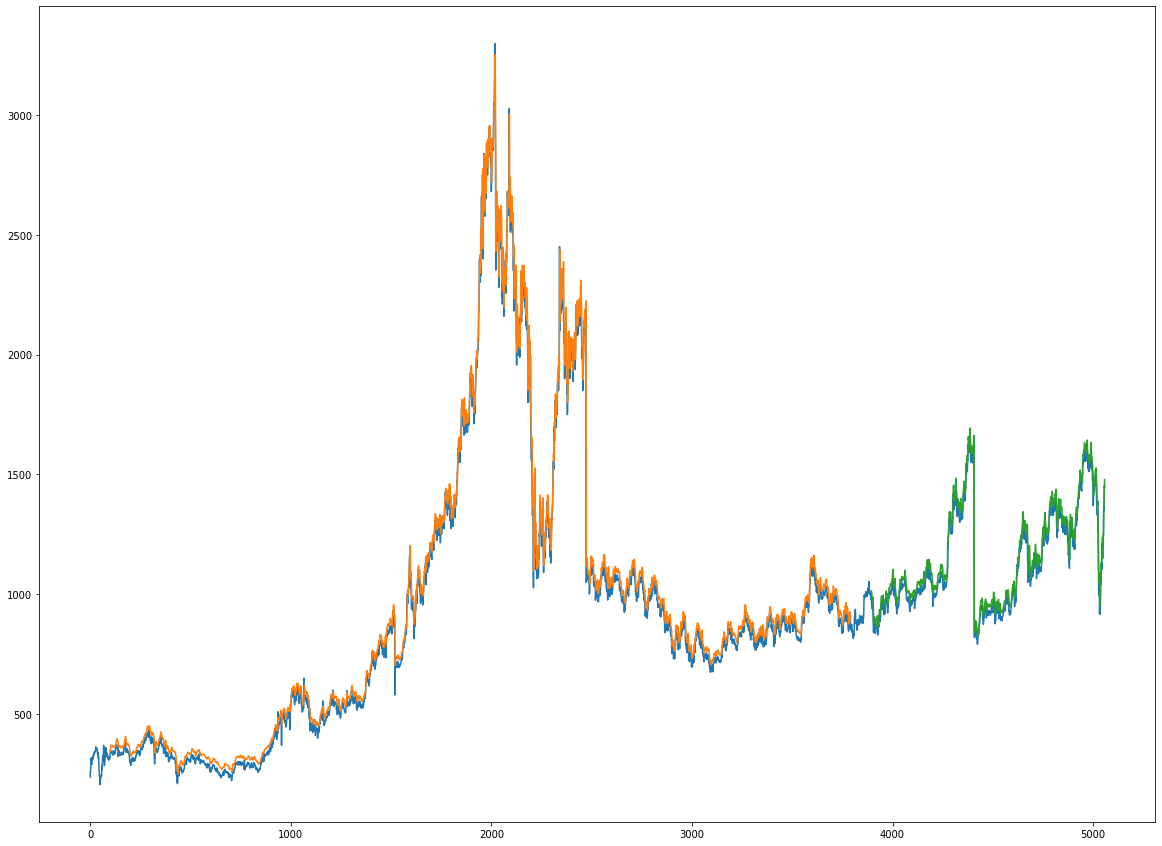

In [36]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.figure(figsize=(20,15))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()